<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Content/Project_Examples/RecreatingMasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NHL Data Visualization

## Project:  Recreating the Masters

### Dr. N. C. Jacob

#### 24 April 2022


Hockey is my favorite spectator sport.  I watch hockey most evenings before bed.  With the Stanley Cup championship approaching, I wanted to see how my club was fairing (and brag a bit).  I found a visualization from the previous season that I felt was worthy of recerating and attempt to do so in this document.



![Master?](https://preview.redd.it/ldafaqqimpe61.png?auto=webp&s=543ee3bc7509b04c164db6a7acccbc30509ab5b9)

NHL uses a point system to determine the winners of the regular season.  The victor of a match is awarded two points.  If the regular time ends in a tie or draw, both teams are awarded a point and then vie in overtime for a third point.  This causes some games to be worth a total of three points while other are only worth two.  A team will need to average more than one point in each game to have a winning season.  Teams represented above the $x$-axis here have scored more than one point each game while those falling below are not having a very good season.  We can also see in each division which team will make the cut for the playoffs.

## Graphical Excellence

The above grahpic displays many aspects of grahpical excellence:  

*   We see that there are five graphics all of which have had the data adjusted for the group it represents.  This is much like using the time value of money, where you count for inflation.  This is excellent because it displays in time the actual expected points which may vary as the season progresses.
*  The time series line has been drawn in a color representing each team.
*  The grahpic does not require a legend since each team has been represented by their logo.
*  Each division is highlighted as well as the entire league, showing us which teams are likely to make the playoffs in each.


## Packages For Project

In [ ]:

import requests
import pandas as pa
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


## Data Gathering

To be able to do this I am going to need sports data.  I think I can find that at pro-hockey reference and [images for the teams](https://www.sportslogos.net/teams/list_by_league/1/National_Hockey_League/NHL/logos/)

The data for this was not readily available so I am going to have to do some work.  I can gather each games data [here](https://www.hockey-reference.com/leagues/NHL_2022_games.html) and then I'll go back and compute the point totals for each team after each game they play.  Let's see if we can get that to work!

In [ ]:
r = requests.get('https://www.hockey-reference.com/leagues/NHL_2022_games.html')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")


len(html_soup.find_all('table'))

1

In [ ]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[0]
df.head(10)

Date              Visitor    G                   Home  G.1  \
0  2021-10-12  Pittsburgh Penguins  6.0    Tampa Bay Lightning  2.0   
1  2021-10-12       Seattle Kraken  3.0   Vegas Golden Knights  4.0   
2  2021-10-13        Winnipeg Jets  1.0          Anaheim Ducks  4.0   
3  2021-10-13   Chicago Blackhawks  2.0     Colorado Avalanche  4.0   
4  2021-10-13    Vancouver Canucks  2.0        Edmonton Oilers  3.0   
5  2021-10-13   Montreal Canadiens  1.0    Toronto Maple Leafs  2.0   
6  2021-10-13     New York Rangers  1.0    Washington Capitals  5.0   
7  2021-10-14   Montreal Canadiens  1.0         Buffalo Sabres  5.0   
8  2021-10-14   New York Islanders  3.0    Carolina Hurricanes  6.0   
9  2021-10-14      Arizona Coyotes  2.0  Columbus Blue Jackets  8.0   

  Unnamed: 5     Att.   LOG Notes  
0        NaN  19092.0  2:33   NaN  
1        NaN  18431.0  2:25   NaN  
2        NaN  16260.0  2:29   NaN  
3        NaN  18037.0  2:32   NaN  
4         SO  16034.0  2:42   NaN  
5        NaN  18493.0  2:33   NaN  
6        NaN  18573.0  2:29   NaN  
7        NaN   8467.0  2:26   NaN  
8        NaN  18680.0  2:46   NaN  
9        NaN  17813.0  2:30   NaN

Well that part worked as well as excepcted!  Let's get all the teams and start building our season by games.  There are 82 games in the season (most have only played around 70 right now when I gathered this!)

In [ ]:
teams = [x.replace(" ","").replace(".","").lower() for x in df.Home.unique()]

games = ['game{}'.format(x) for x in range(1,83)]

In [ ]:
pointsbygame = pa.DataFrame(np.nan, index = games,columns = teams)
pointsbygame.head()

tampabaylightning  vegasgoldenknights  anaheimducks  coloradoavalanche  \
game1                NaN                 NaN           NaN                NaN   
game2                NaN                 NaN           NaN                NaN   
game3                NaN                 NaN           NaN                NaN   
game4                NaN                 NaN           NaN                NaN   
game5                NaN                 NaN           NaN                NaN   

       edmontonoilers  torontomapleleafs  washingtoncapitals  buffalosabres  \
game1             NaN                NaN                 NaN            NaN   
game2             NaN                NaN                 NaN            NaN   
game3             NaN                NaN                 NaN            NaN   
game4             NaN                NaN                 NaN            NaN   
game5             NaN                NaN                 NaN            NaN   

       carolinahurricanes  columbusbluejackets  ...  arizonacoyotes  \
game1                 NaN                  NaN  ...             NaN   
game2                 NaN                  NaN  ...             NaN   
game3                 NaN                  NaN  ...             NaN   
game4                 NaN                  NaN  ...             NaN   
game5                 NaN                  NaN  ...             NaN   

       calgaryflames  chicagoblackhawks  minnesotawild  winnipegjets  \
game1            NaN                NaN            NaN           NaN   
game2            NaN                NaN            NaN           NaN   
game3            NaN                NaN            NaN           NaN   
game4            NaN                NaN            NaN           NaN   
game5            NaN                NaN            NaN           NaN   

       dallasstars  seattlekraken  stlouisblues  vancouvercanucks  \
game1          NaN            NaN           NaN               NaN   
game2          NaN            NaN           NaN               NaN   
game3          NaN            NaN           NaN               NaN   
game4          NaN            NaN           NaN               NaN   
game5          NaN            NaN           NaN               NaN   

       newyorkislanders  
game1               NaN  
game2               NaN  
game3               NaN  
game4               NaN  
game5               NaN  

[5 rows x 32 columns]

In [ ]:
def findwinner(game):
  if game['G']>game['G.1']:
    print('Visitor {}'.format(game['Visitor']) + ' Won')
  else:
    print('Home {}'.format(game['Home']) + ' Won')

In [ ]:
findwinner(df.loc[0])

Visitor Pittsburgh Penguins Won


I need to do a little better than that!  I'll need to add 2 points for that game for the winner and 0 points for the loser (1 if it went to OT).

In [ ]:
for team in teams:
  globals()[team] = []

In [ ]:
def cleanteamname(teamname): #returns the list about the team.
  return globals()[teamname.replace(" ","").replace(".","").lower()]   

In [ ]:
def winner(game):
  if (game["G"] > game["G.1"]) & (not(pa.isnull(game['G']))):
    cleanteamname(game.Visitor).append(2)
  elif not(pa.isnull(game['G'])):
    cleanteamname(game.Home).append(2)
  else:
    cleanteamname(game.Home).append(np.nan)
    cleanteamname(game.Visitor).append(np.nan)

def loser(game):
  if pa.isnull(game['Unnamed: 5']): #No overtime
    val = 0
  else:
    val = 1 #gives a point for OT/SO loss
  if (game['G'] > game['G.1']) & (not(pa.isnull(game['G']))): #home team lost
    cleanteamname(game.Home).append(val)
  elif not(pa.isnull(game['G'])):
    cleanteamname(game.Visitor).append(val)


In [ ]:
df.loc[1300]

Date                  2022-04-29
Visitor       Colorado Avalanche
G                            NaN
Home              Minnesota Wild
G.1                          NaN
Unnamed: 5                   NaN
Att.                         NaN
LOG                          NaN
Notes                        NaN
Name: 1300, dtype: object

In [ ]:
winner(df.loc[1300])

vancouvercanucks

[]

In [ ]:
loser(df.loc[1300])

edmontonoilers

[]

Now that I see those working, I'll clear the values away by resetting all the teams to an empty set

In [ ]:
for team in teams:
  globals()[team] = []

Now to run this code for every game

In [ ]:
for i in df.index:
  winner(df.loc[i])
  loser(df.loc[i])

In [ ]:
stlouisblues

[2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 nan,
 nan]

I think this worked.  Now to store it in the dataframe.

In [ ]:
len(stlouisblues)

82

In [ ]:
pointsbygame['anaheimducks'] = anaheimducks

In [ ]:
for team in teams:
  pointsbygame[team] = globals()[team]

pointsbygame

tampabaylightning  vegasgoldenknights  anaheimducks  \
game1                 0.0                 2.0           2.0   
game2                 2.0                 0.0           0.0   
game3                 2.0                 0.0           2.0   
game4                 0.0                 0.0           0.0   
game5                 1.0                 0.0           0.0   
...                   ...                 ...           ...   
game78                2.0                 2.0           0.0   
game79                2.0                 1.0           0.0   
game80                NaN                 NaN           0.0   
game81                NaN                 NaN           NaN   
game82                NaN                 NaN           NaN   

        coloradoavalanche  edmontonoilers  torontomapleleafs  \
game1                 2.0             2.0                2.0   
game2                 0.0             2.0                0.0   
game3                 0.0             2.0                2.0   
game4                 0.0             2.0                1.0   
game5                 2.0             2.0                0.0   
...                   ...             ...                ...   
game78                0.0             2.0                0.0   
game79                0.0             0.0                1.0   
game80                NaN             NaN                2.0   
game81                NaN             NaN                NaN   
game82                NaN             NaN                NaN   

        washingtoncapitals  buffalosabres  carolinahurricanes  \
game1                  2.0            2.0                 2.0   
game2                  1.0            2.0                 2.0   
game3                  2.0            2.0                 2.0   
game4                  2.0            0.0                 2.0   
game5                  1.0            1.0                 2.0   
...                    ...            ...                 ...   
game78                 2.0            2.0                 2.0   
game79                 1.0            2.0                 2.0   
game80                 NaN            2.0                 2.0   
game81                 NaN            NaN                 NaN   
game82                 NaN            NaN                 NaN   

        columbusbluejackets  ...  arizonacoyotes  calgaryflames  \
game1                   2.0  ...             0.0            0.0   
game2                   2.0  ...             1.0            1.0   
game3                   0.0  ...             0.0            2.0   
game4                   2.0  ...             0.0            2.0   
game5                   0.0  ...             0.0            2.0   
...                     ...  ...             ...            ...   
game78                  1.0  ...             0.0            2.0   
game79                  2.0  ...             1.0            2.0   
game80                  NaN  ...             NaN            NaN   
game81                  NaN  ...             NaN            NaN   
game82                  NaN  ...             NaN            NaN   

        chicagoblackhawks  minnesotawild  winnipegjets  dallasstars  \
game1                 0.0            2.0           0.0          2.0   
game2                 1.0            2.0           0.0          0.0   
game3                 0.0            2.0           1.0          0.0   
game4                 0.0            2.0           2.0          2.0   
game5                 0.0            0.0           2.0          2.0   
...                   ...            ...           ...          ...   
game78                0.0            2.0           0.0          0.0   
game79                0.0            2.0           2.0          2.0   
game80                2.0            NaN           NaN          NaN   
game81                NaN            NaN           NaN          NaN   
game82                NaN            NaN           NaN          NaN   

        seattlekraken  stlouisblues  vancou

In [ ]:
totalpointsbygame = pa.DataFrame(np.nan, index = range(0,83),columns = teams)

for team in teams:
  globals()[team + 'total'] = [0]

for team in teams:
  points = 0
  for game in globals()[team]:
    points = points + game
    globals()[team + 'total'].append(points)

In [ ]:
stlouisbluestotal

[0,
 2,
 4,
 6,
 8,
 10,
 10,
 12,
 13,
 15,
 15,
 17,
 18,
 18,
 18,
 18,
 20,
 20,
 22,
 22,
 23,
 25,
 27,
 27,
 28,
 30,
 32,
 34,
 35,
 37,
 39,
 39,
 41,
 43,
 43,
 45,
 47,
 49,
 49,
 51,
 53,
 55,
 55,
 57,
 57,
 57,
 59,
 61,
 62,
 64,
 66,
 68,
 70,
 70,
 70,
 71,
 71,
 73,
 75,
 76,
 77,
 77,
 79,
 79,
 79,
 81,
 83,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 103,
 105,
 107,
 109,
 nan,
 nan]

In [ ]:
for team in teams:
  totalpointsbygame[team] = globals()[team + 'total']

In [ ]:
totalpointsbygame

tampabaylightning  vegasgoldenknights  anaheimducks  coloradoavalanche  \
0                 0.0                 0.0           0.0                0.0   
1                 0.0                 2.0           2.0                2.0   
2                 2.0                 2.0           2.0                2.0   
3                 4.0                 2.0           4.0                2.0   
4                 4.0                 2.0           4.0                2.0   
..                ...                 ...           ...                ...   
78              104.0                89.0          74.0              116.0   
79              106.0                90.0          74.0              116.0   
80                NaN                 NaN          74.0                NaN   
81                NaN                 NaN           NaN                NaN   
82                NaN                 NaN           NaN                NaN   

    edmontonoilers  torontomapleleafs  washingtoncapitals  buffalosabres  \
0              0.0                0.0                 0.0            0.0   
1              2.0                2.0                 2.0            2.0   
2              4.0                2.0                 3.0            4.0   
3              6.0                4.0                 5.0            6.0   
4              8.0                5.0                 7.0            6.0   
..             ...                ...                 ...            ...   
78            98.0              108.0                99.0           69.0   
79            98.0              109.0               100.0           71.0   
80             NaN              111.0                 NaN           73.0   
81             NaN                NaN                 NaN            NaN   
82             NaN                NaN                 NaN            NaN   

    carolinahurricanes  columbusbluejackets  ...  arizonacoyotes  \
0                  0.0                  0.0  ...             0.0   
1                  2.0                  2.0  ...             0.0   
2                  4.0                  4.0  ...             1.0   
3                  6.0                  4.0  ...             1.0   
4                  8.0                  6.0  ...             1.0   
..                 ...                  ...  ...             ...   
78               108.0                 77.0  ...            50.0   
79               110.0                 79.0  ...            51.0   
80               112.0                  NaN  ...             NaN   
81                 NaN                  NaN  ...             NaN   
82                 NaN                  NaN  ...             NaN   

    calgaryflames  chicagoblackhawks  minnesotawild  winnipegjets  \
0             0.0                0.0            0.0           0.0   
1             0.0                0.0            2.0           0.0   
2             1.0                1.0            4.0           0.0   
3             3.0                1.0            6.0           1.0   
4             5.0                1.0            8.0           3.0   
..            ...                ...            ...           ...   
78          106.0               63.0          107.0          81.0   
79          108.0               63.0          109.0          83.0   
80            NaN               65.0            NaN           NaN   
81            NaN                NaN            NaN           NaN   
82            NaN                NaN            NaN           NaN   

    dallasstars  seattlekraken  stlouisblues  vancouvercanucks  \
0           0.0            0.0           0.0               0.0   
1           2.0            0.0           2.0               1.0   
2           2.0            2.0           4.0               3.0   
3           2.0            3.0           6.0               3.0   
4           4.0            3.0           8.0               3.0   
..          ...            ...           ...               ...   
78         91.0           58.0         105.0  

## Ready for Visualizing

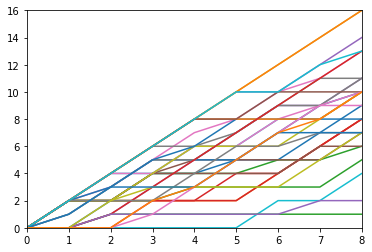

In [ ]:
totalpointsbygame.plot(kind = 'line', legend = False, xlim = [0,8], ylim = [0,16])

Next I need to make the transformation to look at points above average.  I'll need the average of the league to do that.

In [ ]:
np.mean(totalpointsbygame, axis = 1)

0      0.000000
1      1.281250
2      2.343750
3      3.656250
4      4.656250
        ...    
78    86.437500
79    88.483871
80    84.090909
81          NaN
82          NaN
Length: 83, dtype: float64

Now I'll convert the entries to be how much above or below this teams are at any point in the season.

In [ ]:
def comparetoaverage(score,average):
  return score - average

totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1)))

tampabaylightning  vegasgoldenknights  anaheimducks  coloradoavalanche  \
0            0.000000            0.000000      0.000000           0.000000   
1           -1.281250            0.718750      0.718750           0.718750   
2           -0.343750           -0.343750     -0.343750          -0.343750   
3            0.343750           -1.656250      0.343750          -1.656250   
4           -0.656250           -2.656250     -0.656250          -2.656250   
..                ...                 ...           ...                ...   
78          17.562500            2.562500    -12.437500          29.562500   
79          17.516129            1.516129    -14.483871          27.516129   
80                NaN                 NaN    -10.090909                NaN   
81                NaN                 NaN           NaN                NaN   
82                NaN                 NaN           NaN                NaN   

    edmontonoilers  torontomapleleafs  washingtoncapitals  buffalosabres  \
0         0.000000           0.000000            0.000000       0.000000   
1         0.718750           0.718750            0.718750       0.718750   
2         1.656250          -0.343750            0.656250       1.656250   
3         2.343750           0.343750            1.343750       2.343750   
4         3.343750           0.343750            2.343750       1.343750   
..             ...                ...                 ...            ...   
78       11.562500          21.562500           12.562500     -17.437500   
79        9.516129          20.516129           11.516129     -17.483871   
80             NaN          26.909091                 NaN     -11.090909   
81             NaN                NaN                 NaN            NaN   
82             NaN                NaN                 NaN            NaN   

    carolinahurricanes  columbusbluejackets  ...  arizonacoyotes  \
0             0.000000             0.000000  ...        0.000000   
1             0.718750             0.718750  ...       -1.281250   
2             1.656250             1.656250  ...       -1.343750   
3             2.343750             0.343750  ...       -2.656250   
4             3.343750             1.343750  ...       -3.656250   
..                 ...                  ...  ...             ...   
78           21.562500            -9.437500  ...      -36.437500   
79           21.516129            -9.483871  ...      -37.483871   
80           27.909091                  NaN  ...             NaN   
81                 NaN                  NaN  ...             NaN   
82                 NaN                  NaN  ...             NaN   

    calgaryflames  chicagoblackhawks  minnesotawild  winnipegjets  \
0        0.000000           0.000000       0.000000      0.000000   
1       -1.281250          -1.281250       0.718750     -1.281250   
2       -1.343750          -1.343750       1.656250     -2.343750   
3       -0.656250          -2.656250       2.343750     -2.656250   
4        0.343750          -3.656250       3.343750     -1.656250   
..            ...                ...            ...           ...   
78      19.562500         -23.437500      20.562500     -5.437500   
79      19.516129         -25.483871      20.516129     -5.483871   
80            NaN         -19.090909            NaN           NaN   
81            NaN                NaN            NaN           NaN   
82            NaN                NaN            NaN           NaN   

    dallasstars  seattlekraken  stlouisblues  vancouvercanucks  \
0      0.000000        0.00000      0.000000          0.000000   
1      0.718750       -1.28125      0.718750         -0.281250   
2     -0.343750       -0.34375      1.656250          0.656250   
3     -1.656250       -0.65625      2.343750         -0.656250   
4     -0.656250       -1.65625      3.343750         -1.656250   
..          ...            ...           ...               ...   
78     4.562500      -28.43750     18.562500  

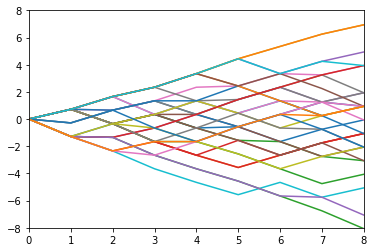

In [ ]:
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).plot(kind = 'line', legend = False, xlim = [0,8], ylim = [-8,8])

Let's try to cut the graph off at 10 games but leave some room for team emblems.

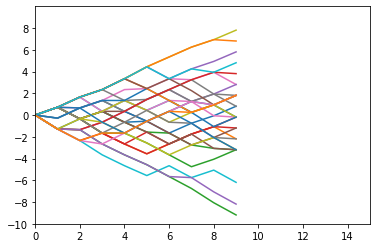

In [ ]:
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).iloc[0:10,:].plot(kind = 'line', legend = False, xlim = [0,15], ylim = [-10,10], yticks = range(-10,10,2))

## Team Colors

Next I am going to work on the colors so that they correspond to the team colors.

In [ ]:
colors = {
    'anaheimducks':'#F47A38',
    'arizonacoyotes':'#8C2633'
}

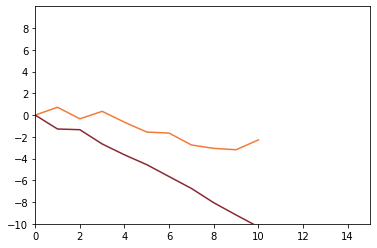

In [ ]:
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:10,['anaheimducks','arizonacoyotes']].plot(kind = 'line', legend = False, xlim = [0,15], ylim = [-10,10], yticks = range(-10,10,2), color = colors)

I think that is working.  This is not the most exciting way to do this but [the website](https://teamcolorcodes.com/nhl-team-color-codes/) I found requires lots of clicking...

In [ ]:
colors['bostonbruins'] = '#FFB81C'
colors['buffalosabres'] = '#002654'
colors['calgaryflames'] = '#c8102E'
colors['carolinahurricanes'] = '#cc0000'
colors['chicagoblackhawks'] = '#CF0A2C'
colors['coloradoavalanche'] = '#6F263D'
colors['columbusbluejackets'] = '#002654'
colors['dallasstars'] = '#006847'
colors['detroitredwings'] = '#ce1126'
colors['edmontonoilers'] = '#041E42'
colors['floridapanthers'] = '#041E42'
colors['losangeleskings'] = '#111111'
colors['minnesotawild'] = '#A6192E'
colors['montrealcanadiens'] = '#AF1E2D'
colors['nashvillepredators'] = '#FFB81C'
colors['newjerseydevils'] = '#CE1126'
colors['newyorkislanders'] = '#00539b'
colors['newyorkrangers'] = '#0038A8'
colors['ottawasenators'] = '#c52032'
colors['pittsburghpenguins'] = '#000000'
colors['philadelphiaflyers'] = '#F74902'
colors['stlouisblues'] = '#002F87'
colors['sanjosesharks'] = '#006D75'
colors['seattlekraken'] = '#001628'
colors['tampabaylightning'] = '#002868'
colors['torontomapleleafs'] = '#00205b'
colors['vancouvercanucks'] = '#00205B'
colors['vegasgoldenknights'] = '#B4975A'
colors['washingtoncapitals'] = '#041E42'
colors['winnipegjets'] = '#041E42'

In [ ]:
len(colors)

32

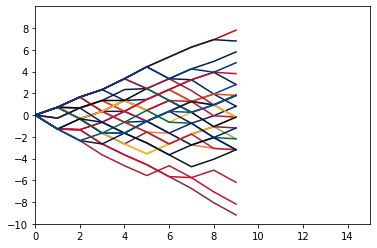

In [ ]:
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).iloc[0:10,:].plot(kind = 'line', legend = False, xlim = [0,15], ylim = [-10,10], yticks = range(-10,10,2), color = colors)

## Divisions

I am going to need the divisions for each club.

In [ ]:
atlantic = [
            'floridapanthers',
            'torontomapleleafs',
            'tampabaylightning',
            'bostonbruins',
            'detroitredwings',
            'buffalosabres',
            'ottawasenators',
            'montrealcanadiens'
]

metropolotian = [
                 'carolinahurricanes',
                 'newyorkrangers',
                 'newyorkislanders',
                 'pittsburghpenguins',
                 'washingtoncapitals',
                 'columbusbluejackets',
                 'newjerseydevils',
                 'philadelphiaflyers'
]

central = [
           'coloradoavalanche',
           'minnesotawild',
           'stlouisblues',
           'dallasstars',
           'nashvillepredators',
           'winnipegjets',
           'chicagoblackhawks',
           'arizonacoyotes'
]

pacific = [
           'calgaryflames',
           'edmontonoilers',
           'losangeleskings',
           'vegasgoldenknights',
           'vancouvercanucks',
           'sanjosesharks',
           'anaheimducks',
           'seattlekraken'
]

division = [atlantic, metropolotian, central, pacific]
Divisions = ['Atlantic', 'Metropolotian', 'Central', 'Pacific']

## Emblems

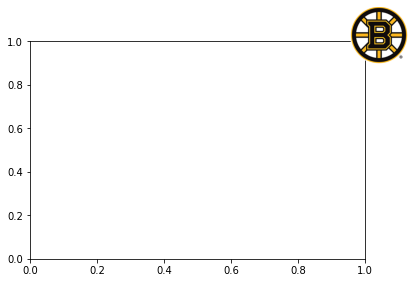

In [ ]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

arr_lena = plt.imread('bostonbruins.png')

#ax.imshow(arr_lena)
newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='NE', zorder=1)
newax.imshow(arr_lena)
newax.axis('off')
#imagebox = OffsetImage(arr_lena, zoom=0.2)

#ab = AnnotationBbox(imagebox, (0.4, 0.6))

#ax.add_artist(ab)
plt.draw()
plt.show()

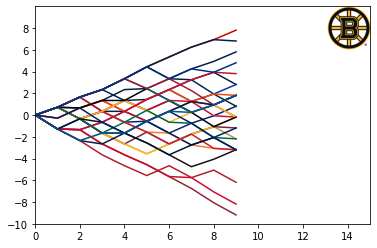

In [ ]:


fig = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).iloc[0:10,:].plot(kind = 'line', legend = False, xlim = [0,15], ylim = [-10,10], yticks = range(-10,10,2), color = colors)


arr_lena = plt.imread('bostonbruins.png')


axin = fig.inset_axes([0.8,0.8,0.2,0.2], anchor='NE', zorder=1)    # create new inset axes in data coordinates
axin.imshow(arr_lena)
axin.axis('off')




plt.show()


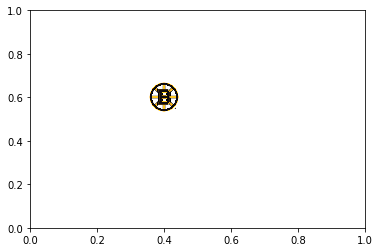

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

arr_lena = plt.imread('bostonbruins.png')


imagebox = OffsetImage(arr_lena, zoom=0.2)

ab = AnnotationBbox(imagebox, (0.4, 0.6), frameon = False)

ax.add_artist(ab)
plt.draw()
plt.show()

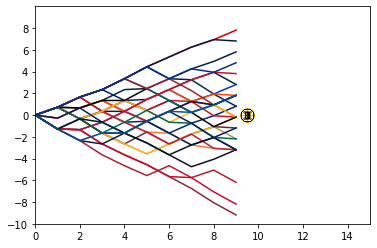

In [ ]:
fig = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).iloc[0:10,:].plot(kind = 'line', legend = False, xlim = [0,15], ylim = [-10,10], yticks = range(-10,10,2), color = colors)




arr_lena = plt.imread('bostonbruins.png')


imagebox = OffsetImage(arr_lena, zoom=0.1)

ab = AnnotationBbox(imagebox, (9.5, 0), frameon = False)

fig.add_artist(ab)




plt.show()

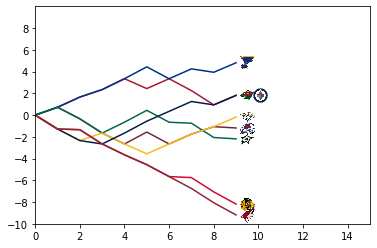

In [ ]:
fig = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:9,central].plot(kind = 'line', legend = False, xlim = [0,15], ylim = [-10,10], yticks = range(-10,10,2), color = colors)
dontoverlay = []
for team in central:
  y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[9,team]
  if y in dontoverlay:
    move = .6
  else:
    move = 0
  dontoverlay.append(y)
  arr_lena = plt.imread(team + '.png') #needs to be team name +".png"
  imagebox = OffsetImage(arr_lena, zoom=0.1)
  ab = AnnotationBbox(imagebox, (9.5+move,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[9,team] ), frameon = False)
  fig.add_artist(ab)

plt.show()


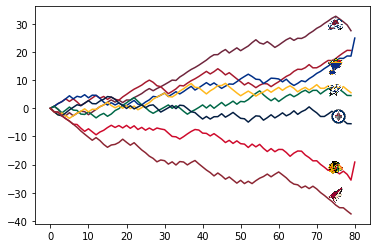

In [ ]:
fig = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,central].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        #xlim = [0,15], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors)
dontoverlay = []
for team in central:
  y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[9,team]
  if y in dontoverlay:
    move = .6
  else:
    move = 0
  dontoverlay.append(y)
  arr_lena = plt.imread(team + '.png') #needs to be team name +".png"
  imagebox = OffsetImage(arr_lena, zoom=0.1)
  ab = AnnotationBbox(imagebox, (75+move,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[72,team] ), frameon = False)
  fig.add_artist(ab)

plt.show()

## Putting it all Together

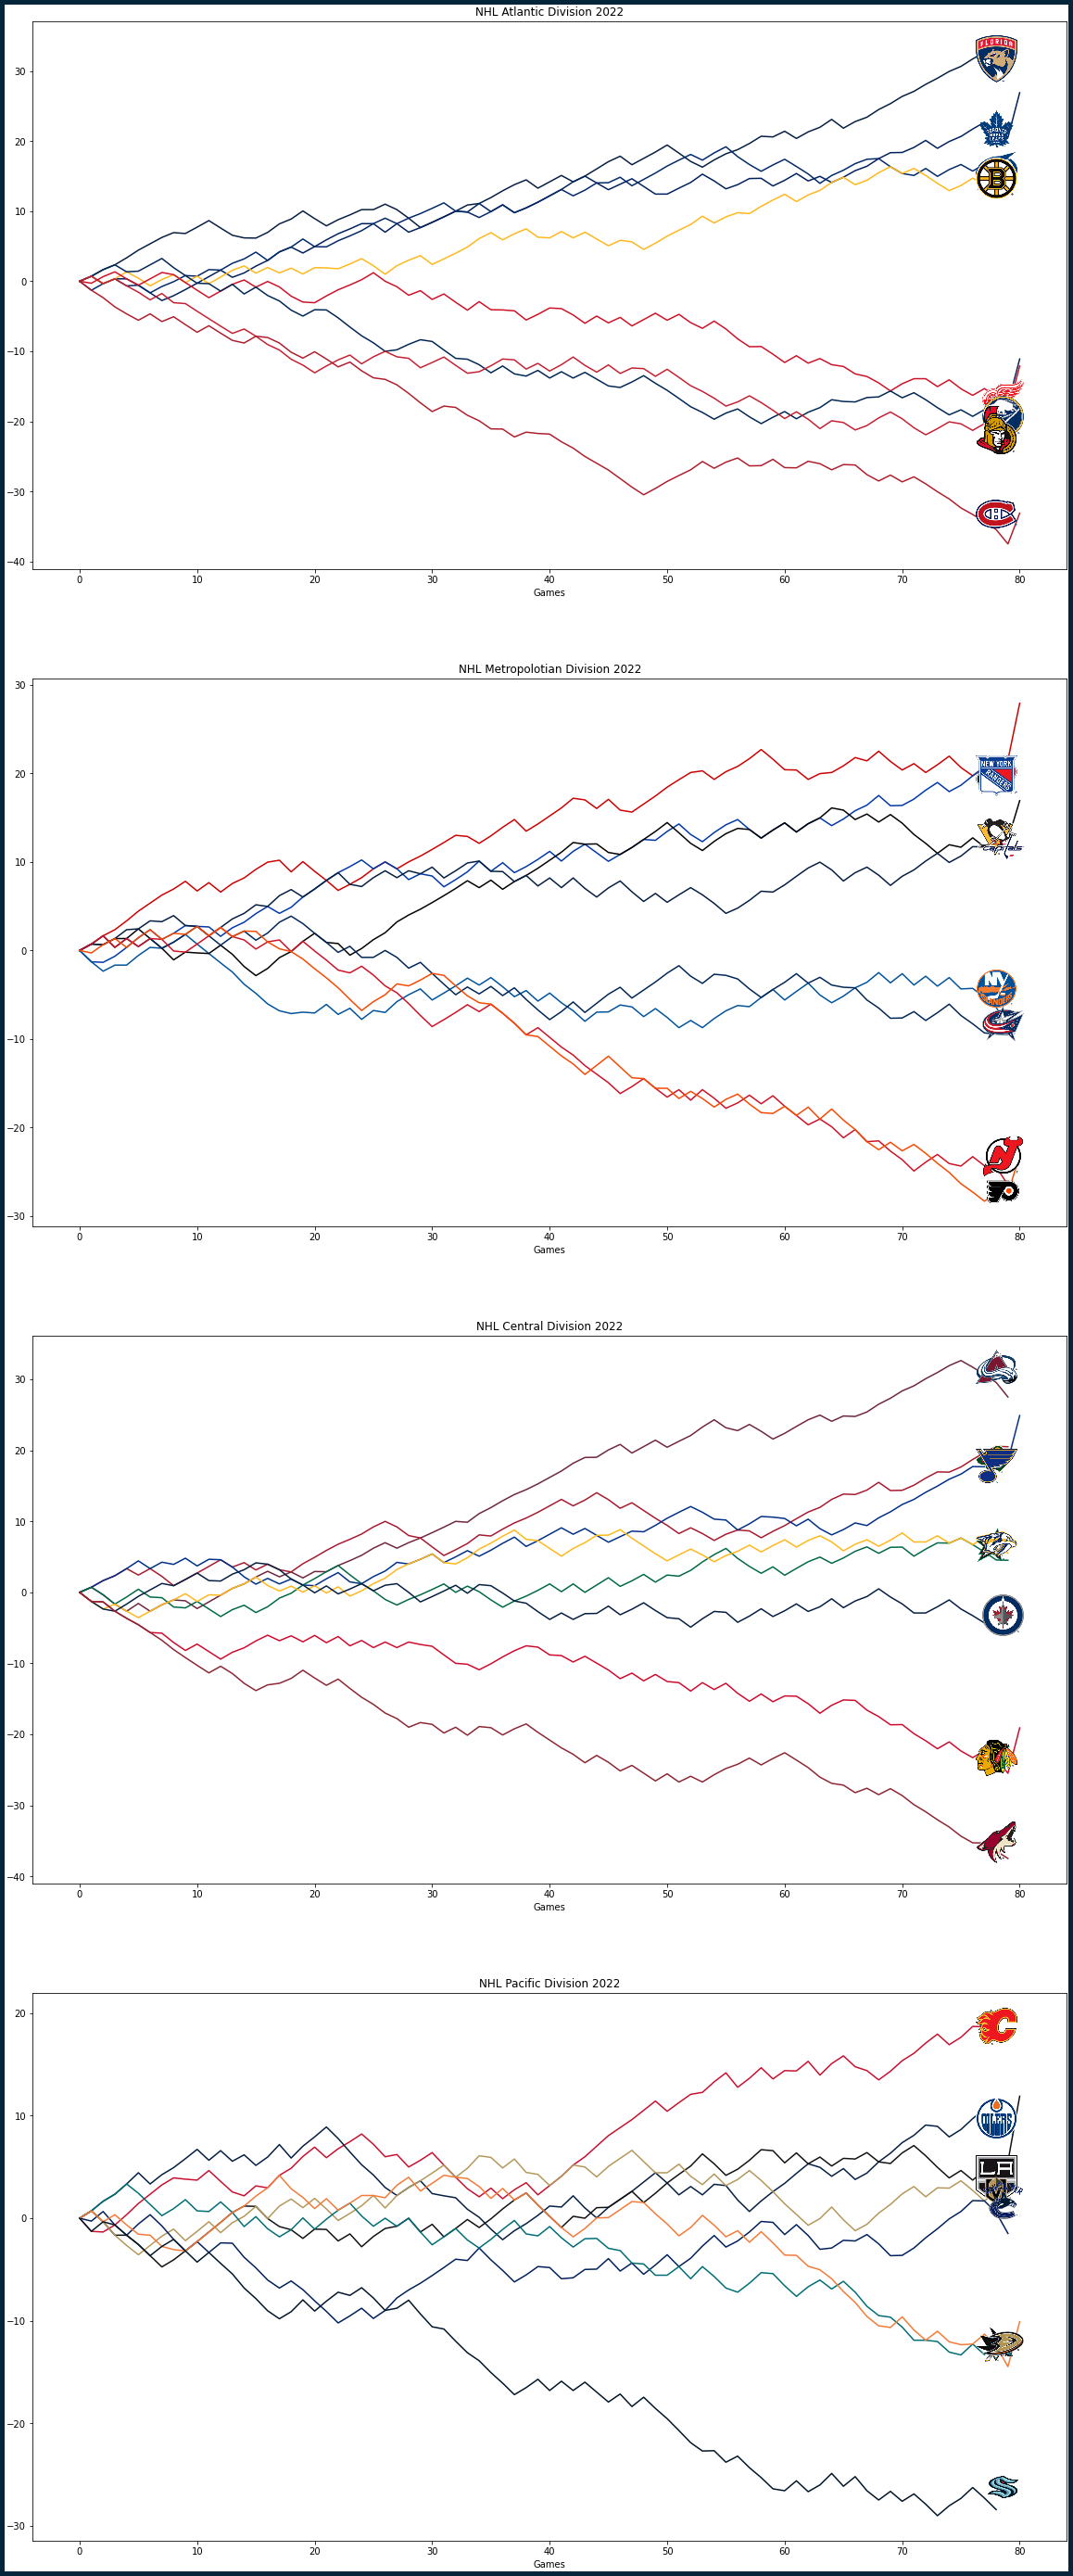

In [ ]:
fig, ax = plt.subplots(4,linewidth=10, edgecolor="#04253a")
fig.set_figheight(50)
fig.set_figwidth(20)

for i, div in enumerate(division):
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        #xlim = [0,15], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i])
  dontoverlay = []
  for team in div:
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[9,team]
    if y in dontoverlay:
      move = .6
    else:
      move = 0
    dontoverlay.append(y)
    arr_lena = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr_lena, zoom=0.3)
    ab = AnnotationBbox(imagebox, (78+move,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[76,team] ), frameon = False)
    ax[i].add_artist(ab)
  ax[i].set_title("NHL {} Division 2022".format(Divisions[i]))
  ax[i].set(xlabel = 'Games')

plt.show()

Trying to add the borders.

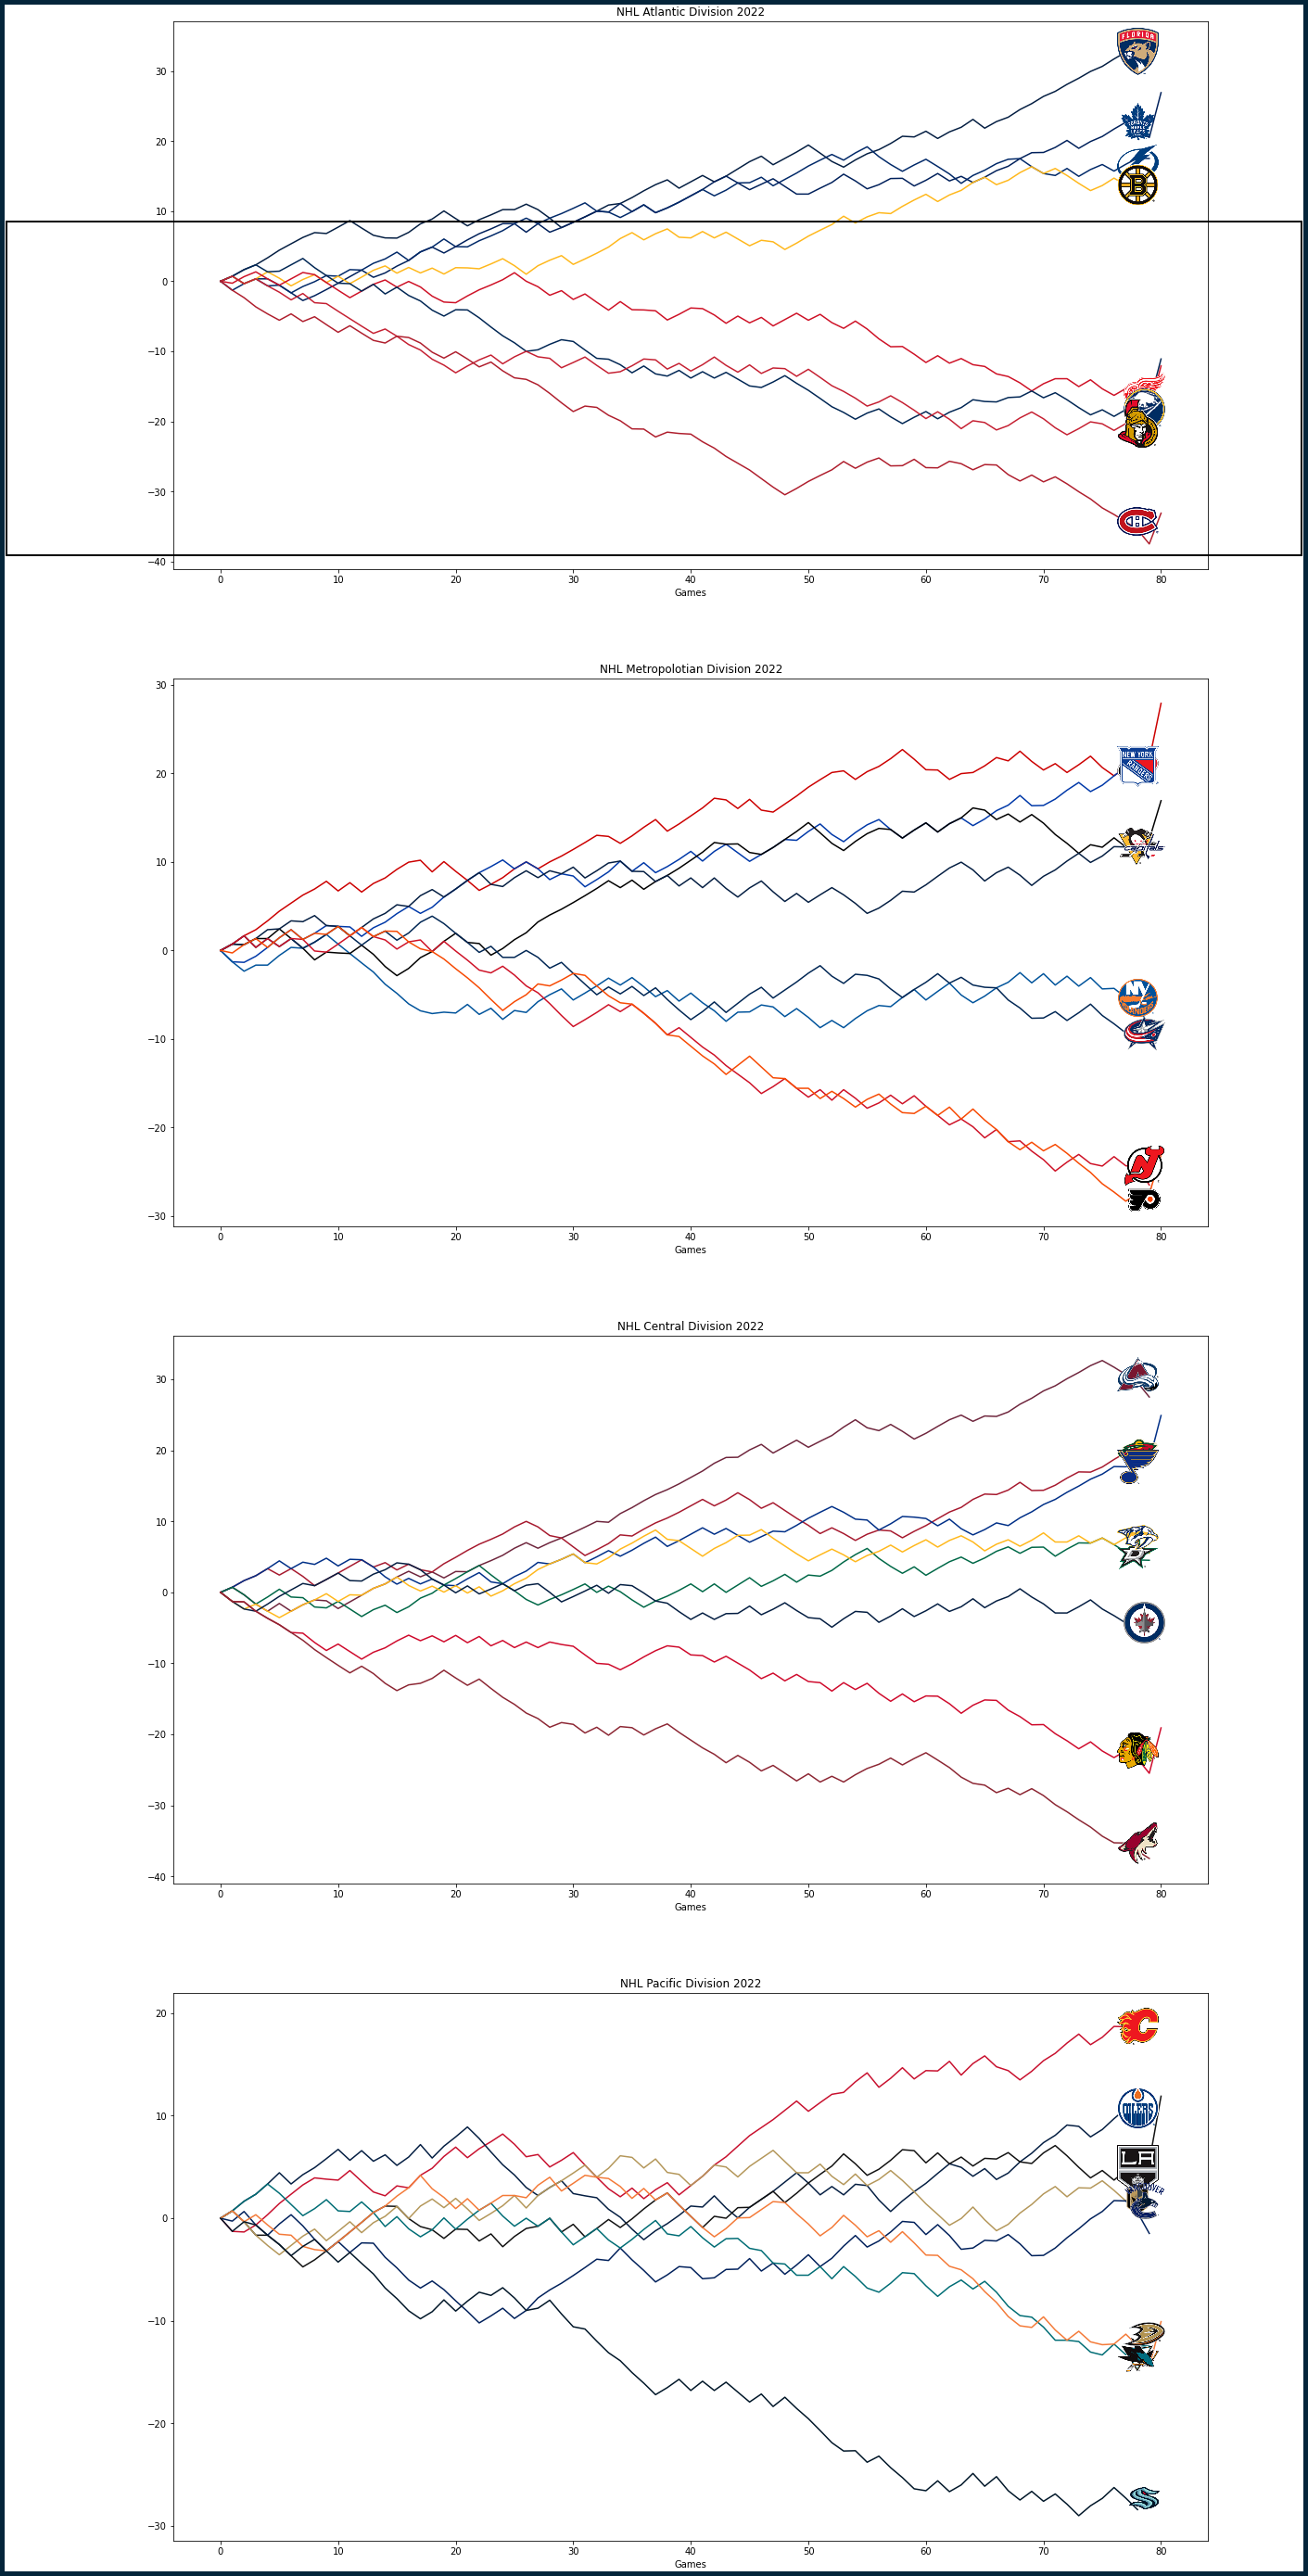

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,linewidth=10, edgecolor="#04253a")
fig.set_figheight(50)
fig.set_figwidth(20)

for i, div in enumerate(division):
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        #xlim = [0,15], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i])
  rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.0, 0.72), 0.97, 0.1, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
  )
  fig.patches.extend([rect])
  dontoverlay = []
  for team in div:
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[9,team]
    if y in dontoverlay:
      move = .6
    else:
      move = 0
    dontoverlay.append(y)
    arr_lena = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr_lena, zoom=0.3)
    ab = AnnotationBbox(imagebox, (78+move,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[77,team] ), frameon = False)
    ax[i].add_artist(ab)
  ax[i].set_title("NHL {} Division 2022".format(Divisions[i]))
  ax[i].set(xlabel = 'Games')

plt.show()



plt.tight_layout()

I cannot seem to get the frames to work.  Something with the rectangles is just not going to do it.  That's not great but something I should move on from and keep as something I was not able to do.  

I am seeing my emblems sit on top of one another.  I don't like that at all so I'll try to fix that.  Before I had used the `dontoverlay` but that worked well only when the numbers were small (and the graphics too!)  I'll need to look for a range around them!

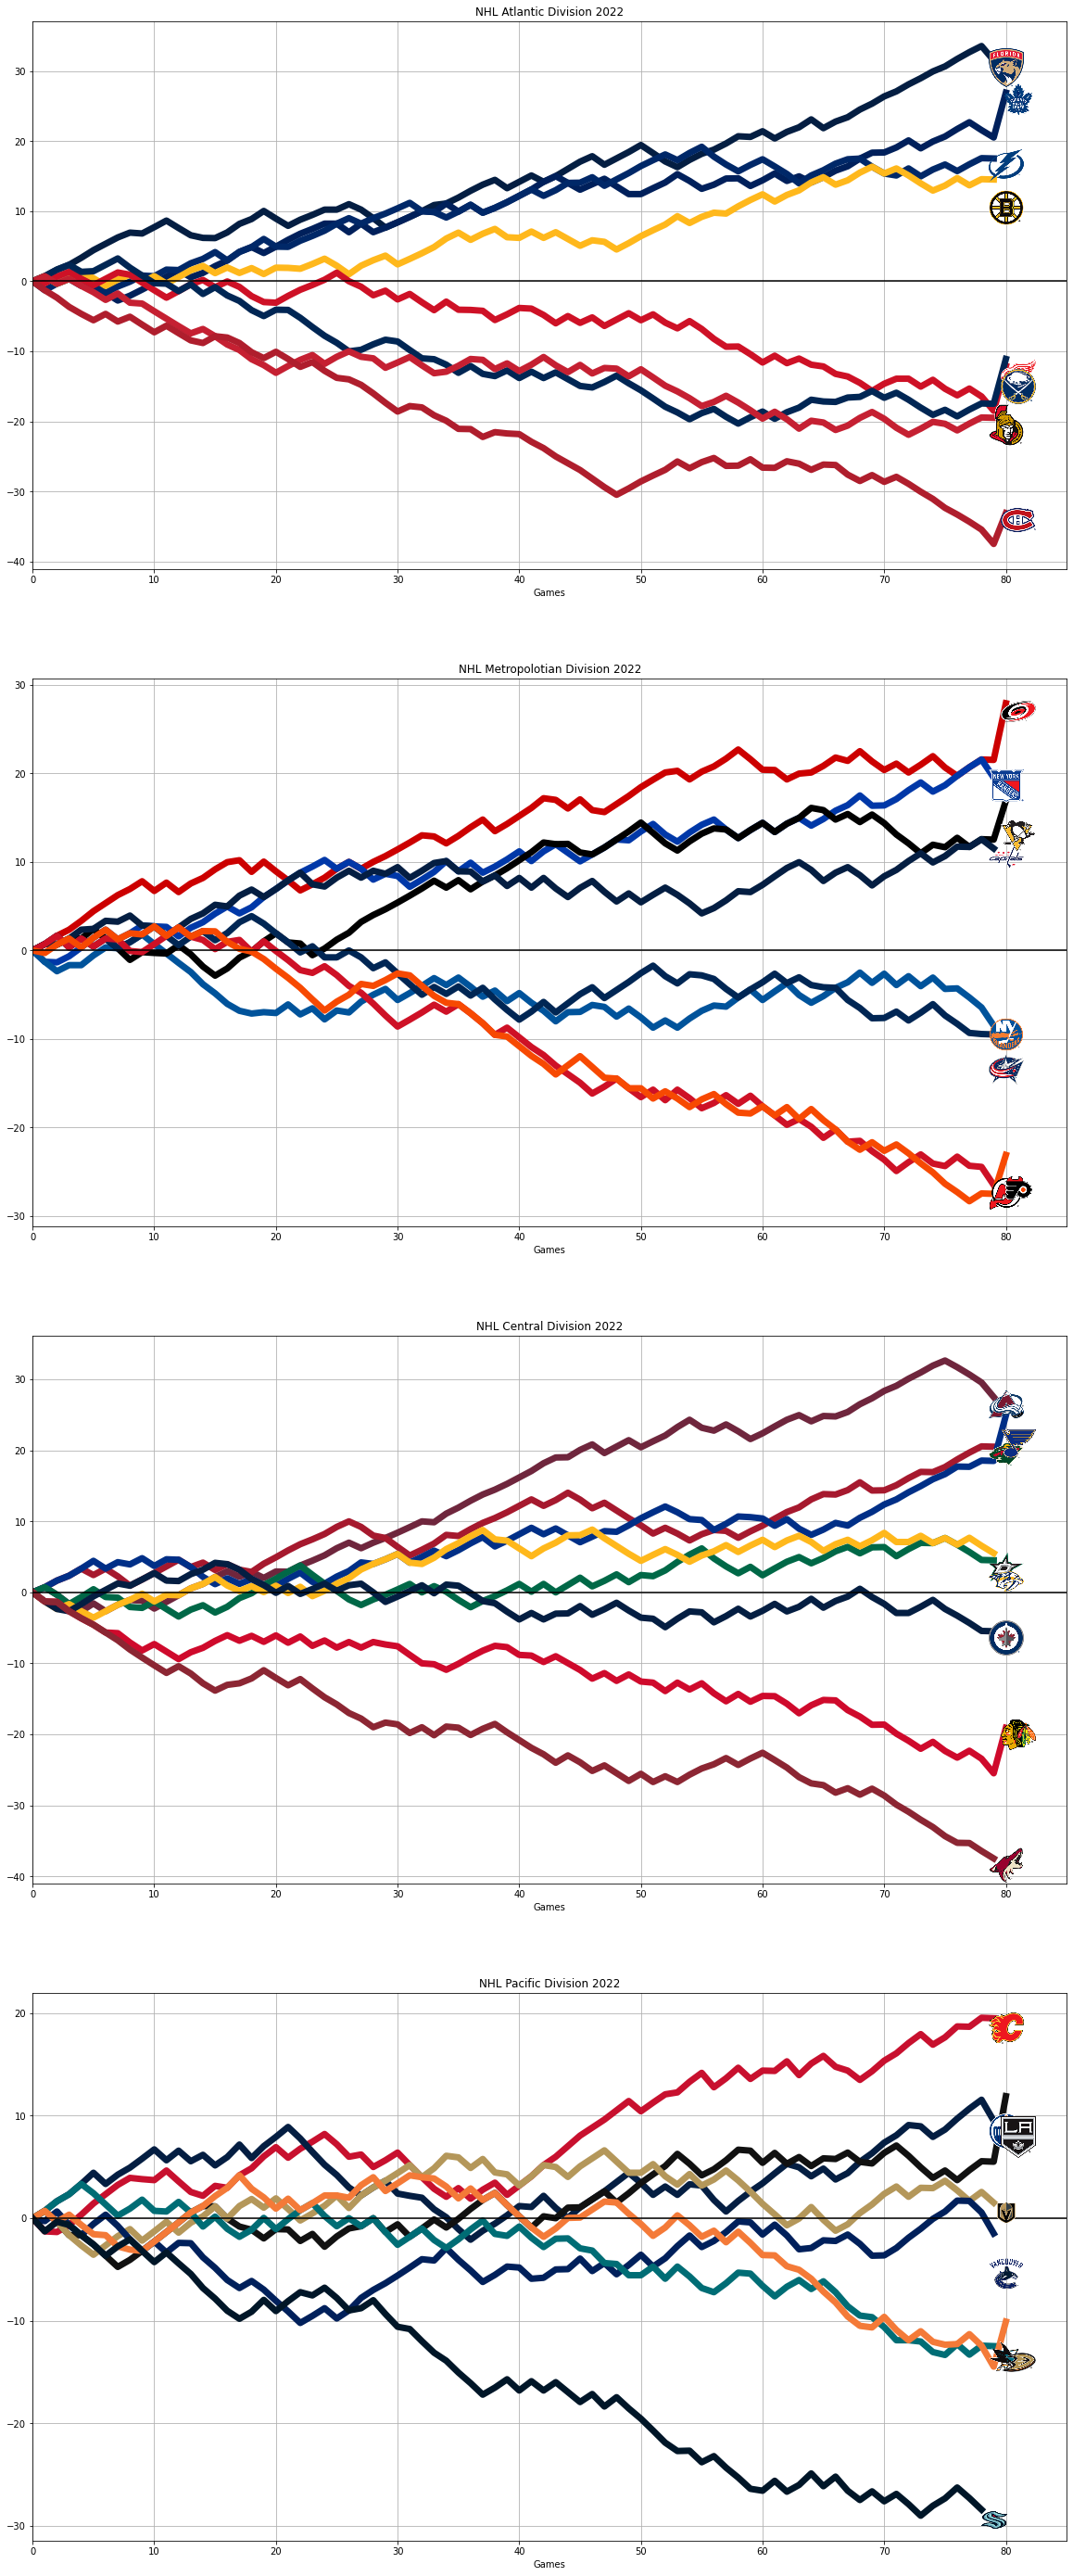

In [ ]:
gamesplayed = (~pa.isnull(totalpointsbygame).loc[1:,]).cumsum(0).max()

fig, ax = plt.subplots(4)
fig.set_figheight(50)
fig.set_figwidth(20)

for i, div in enumerate(division):
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i],
                                                                                                                        grid = True)
  for line in ax[i].get_lines():
    line.set_linewidth(7)
  dontoverlay = []
  for team in div:
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
    testagainstploted = [100]
    for x in dontoverlay:
      testagainstploted.append(x-y)
    if min(np.abs(testagainstploted))<4:
      move = move - 3
    else:
      move = 0
    dontoverlay.append(y)
    arr = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr, zoom=0.25)
    ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move-1 ), frameon = False)
    ax[i].add_artist(ab)
  ax[i].set_title("NHL {} Division 2022".format(Divisions[i]))
  ax[i].set(xlabel = 'Games')
  ax[i].axhline(color = 'black')

plt.show()



#plt.tight_layout()

I am not super happy with that outcome either.  I have it moving an emblom up regaurdless of whether they are above in the standings.  

I did add a clever piece of coding.  Not all teams had played the same number of games so I found how many games they had played by counting how many were not null.

In [ ]:
(~pa.isnull(totalpointsbygame).loc[1:,]).cumsum(0).max()

tampabaylightning      79
vegasgoldenknights     79
anaheimducks           80
coloradoavalanche      79
edmontonoilers         79
torontomapleleafs      80
washingtoncapitals     79
buffalosabres          80
carolinahurricanes     80
columbusbluejackets    79
detroitredwings        80
floridapanthers        79
losangeleskings        80
nashvillepredators     79
newyorkrangers         79
ottawasenators         79
newjerseydevils        79
philadelphiaflyers     80
bostonbruins           79
montrealcanadiens      80
pittsburghpenguins     80
sanjosesharks          79
arizonacoyotes         79
calgaryflames          79
chicagoblackhawks      80
minnesotawild          79
winnipegjets           79
dallasstars            79
seattlekraken          78
stlouisblues           80
vancouvercanucks       79
newyorkislanders       79
dtype: int64

I keep making changes without doing a new cell.  I tweeked the size of the lines, added grids and but the $x$-axis on the graph.  I also limited the length of the $x$-axis so as not to include the negative values.

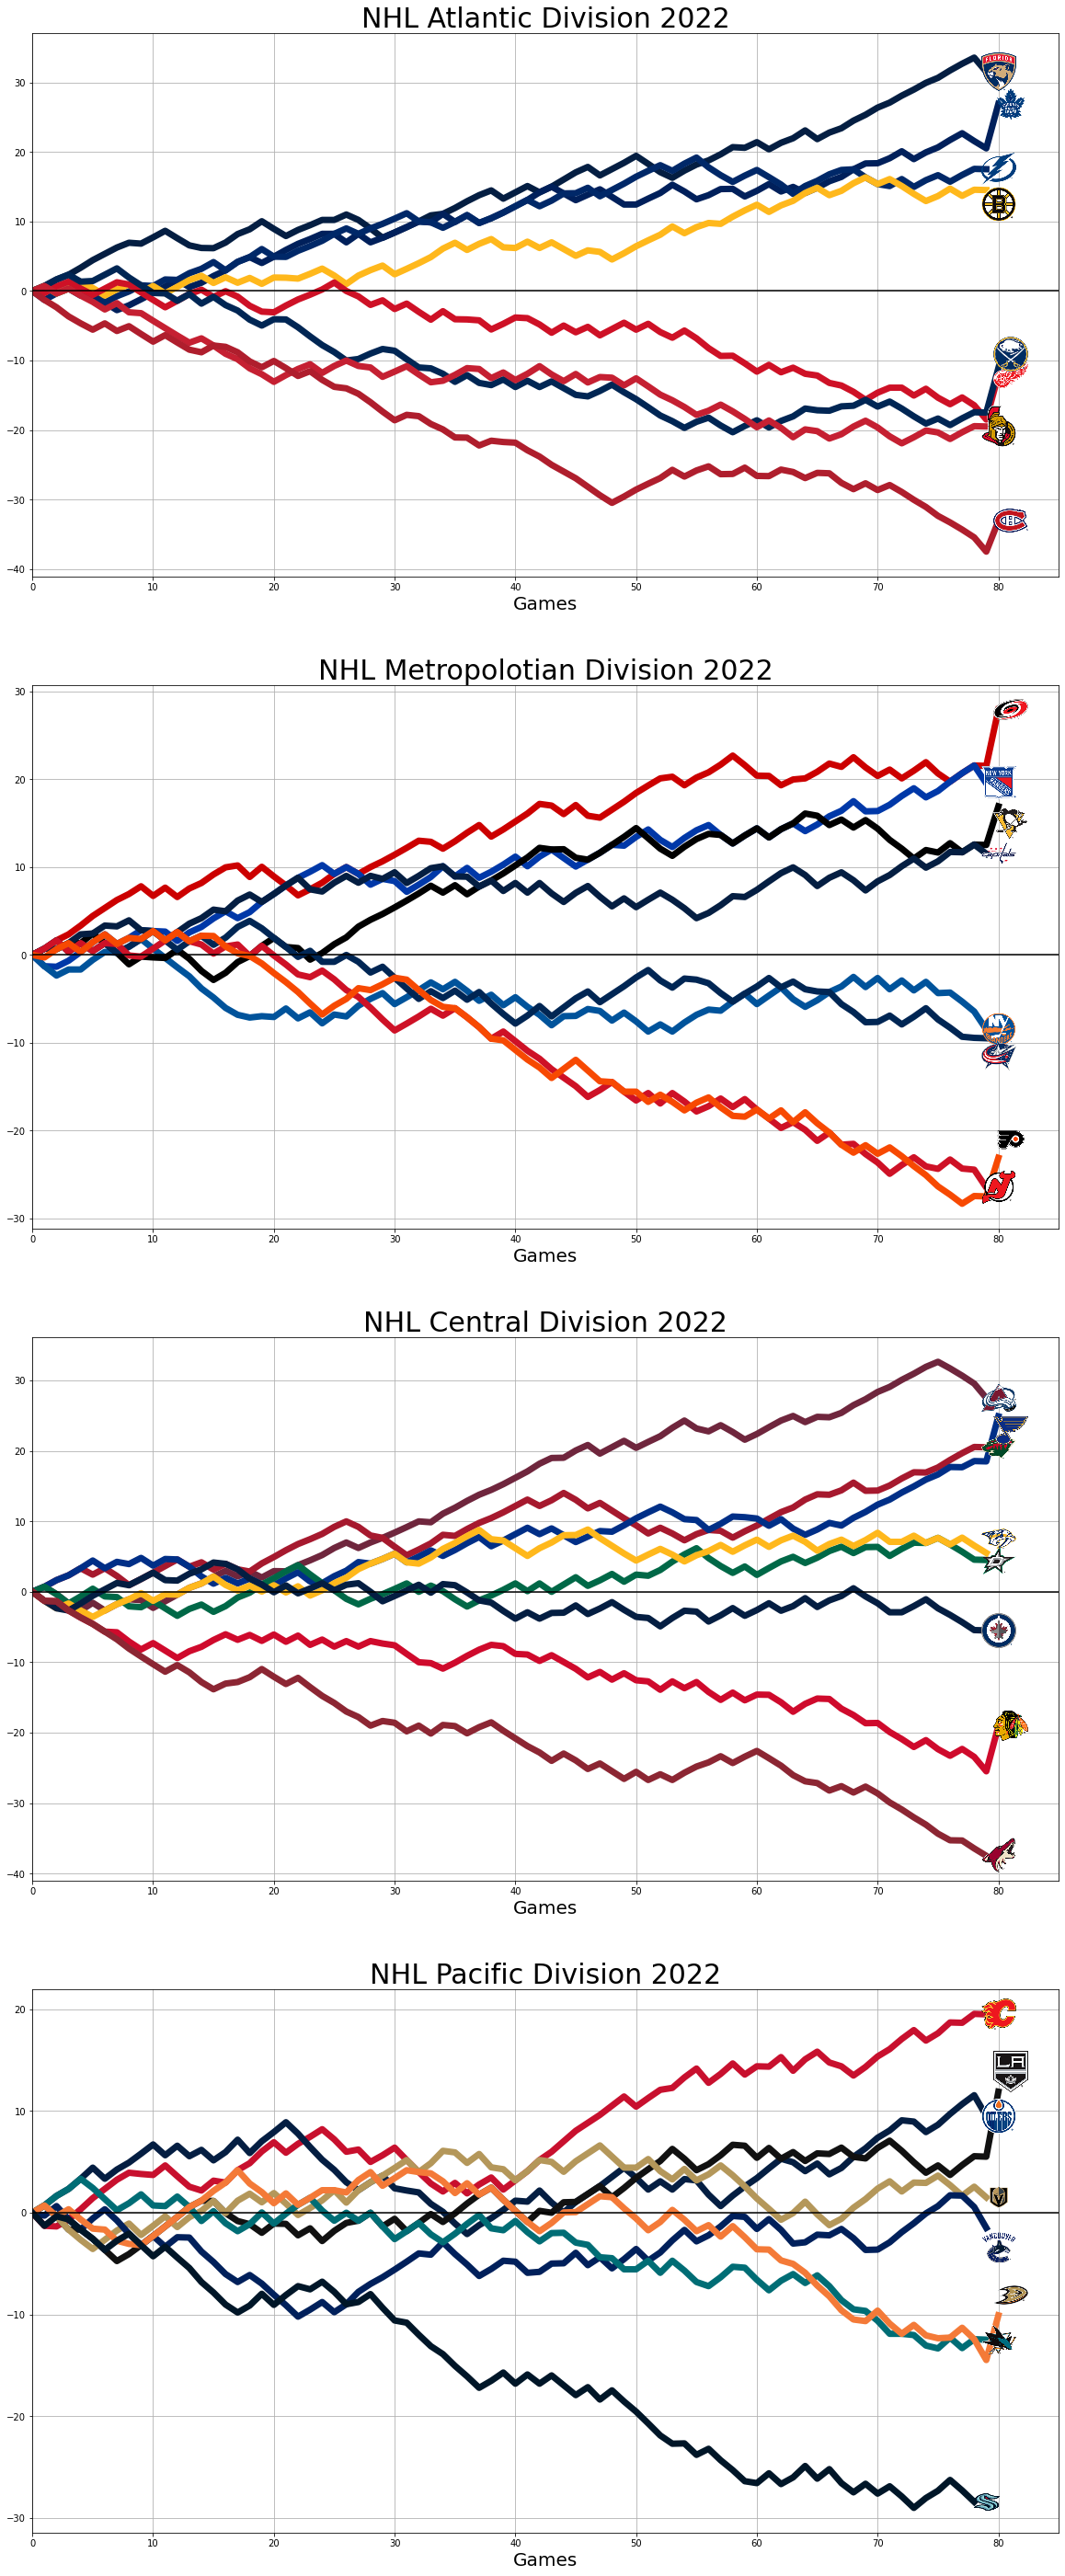

In [ ]:
gamesplayed = (~pa.isnull(totalpointsbygame).loc[1:,]).cumsum(0).max()

fig, ax = plt.subplots(4)
fig.set_figheight(50)
fig.set_figwidth(20)

for i, div in enumerate(division):
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i],
                                                                                                                        grid = True)
  for line in ax[i].get_lines():
    line.set_linewidth(7)
  dontoverlay = []
  for team in div:
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
    testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
    for x in dontoverlay:
      testagainstploted.append(x-y)
    if min(np.abs(testagainstploted))<4:
      if min(np.abs(testagainstploted)) in testagainstploted:
        move = move - 2
      else:
        move = move + 2
    else:
      move = 0
    dontoverlay.append(y)
    arr = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr, zoom=0.25)
    ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
    ax[i].add_artist(ab)
  ax[i].set_title("NHL {} Division 2022".format(Divisions[i]), fontsize = 30)
  ax[i].set_xlabel('Games', fontsize = 20)
  ax[i].axhline(color = 'black')

plt.show()

Above I changed font size on the titles and labels.  I think I have the embloms not overlapping too bad.  I think I am ready to put the big boy on here with all the teams together...

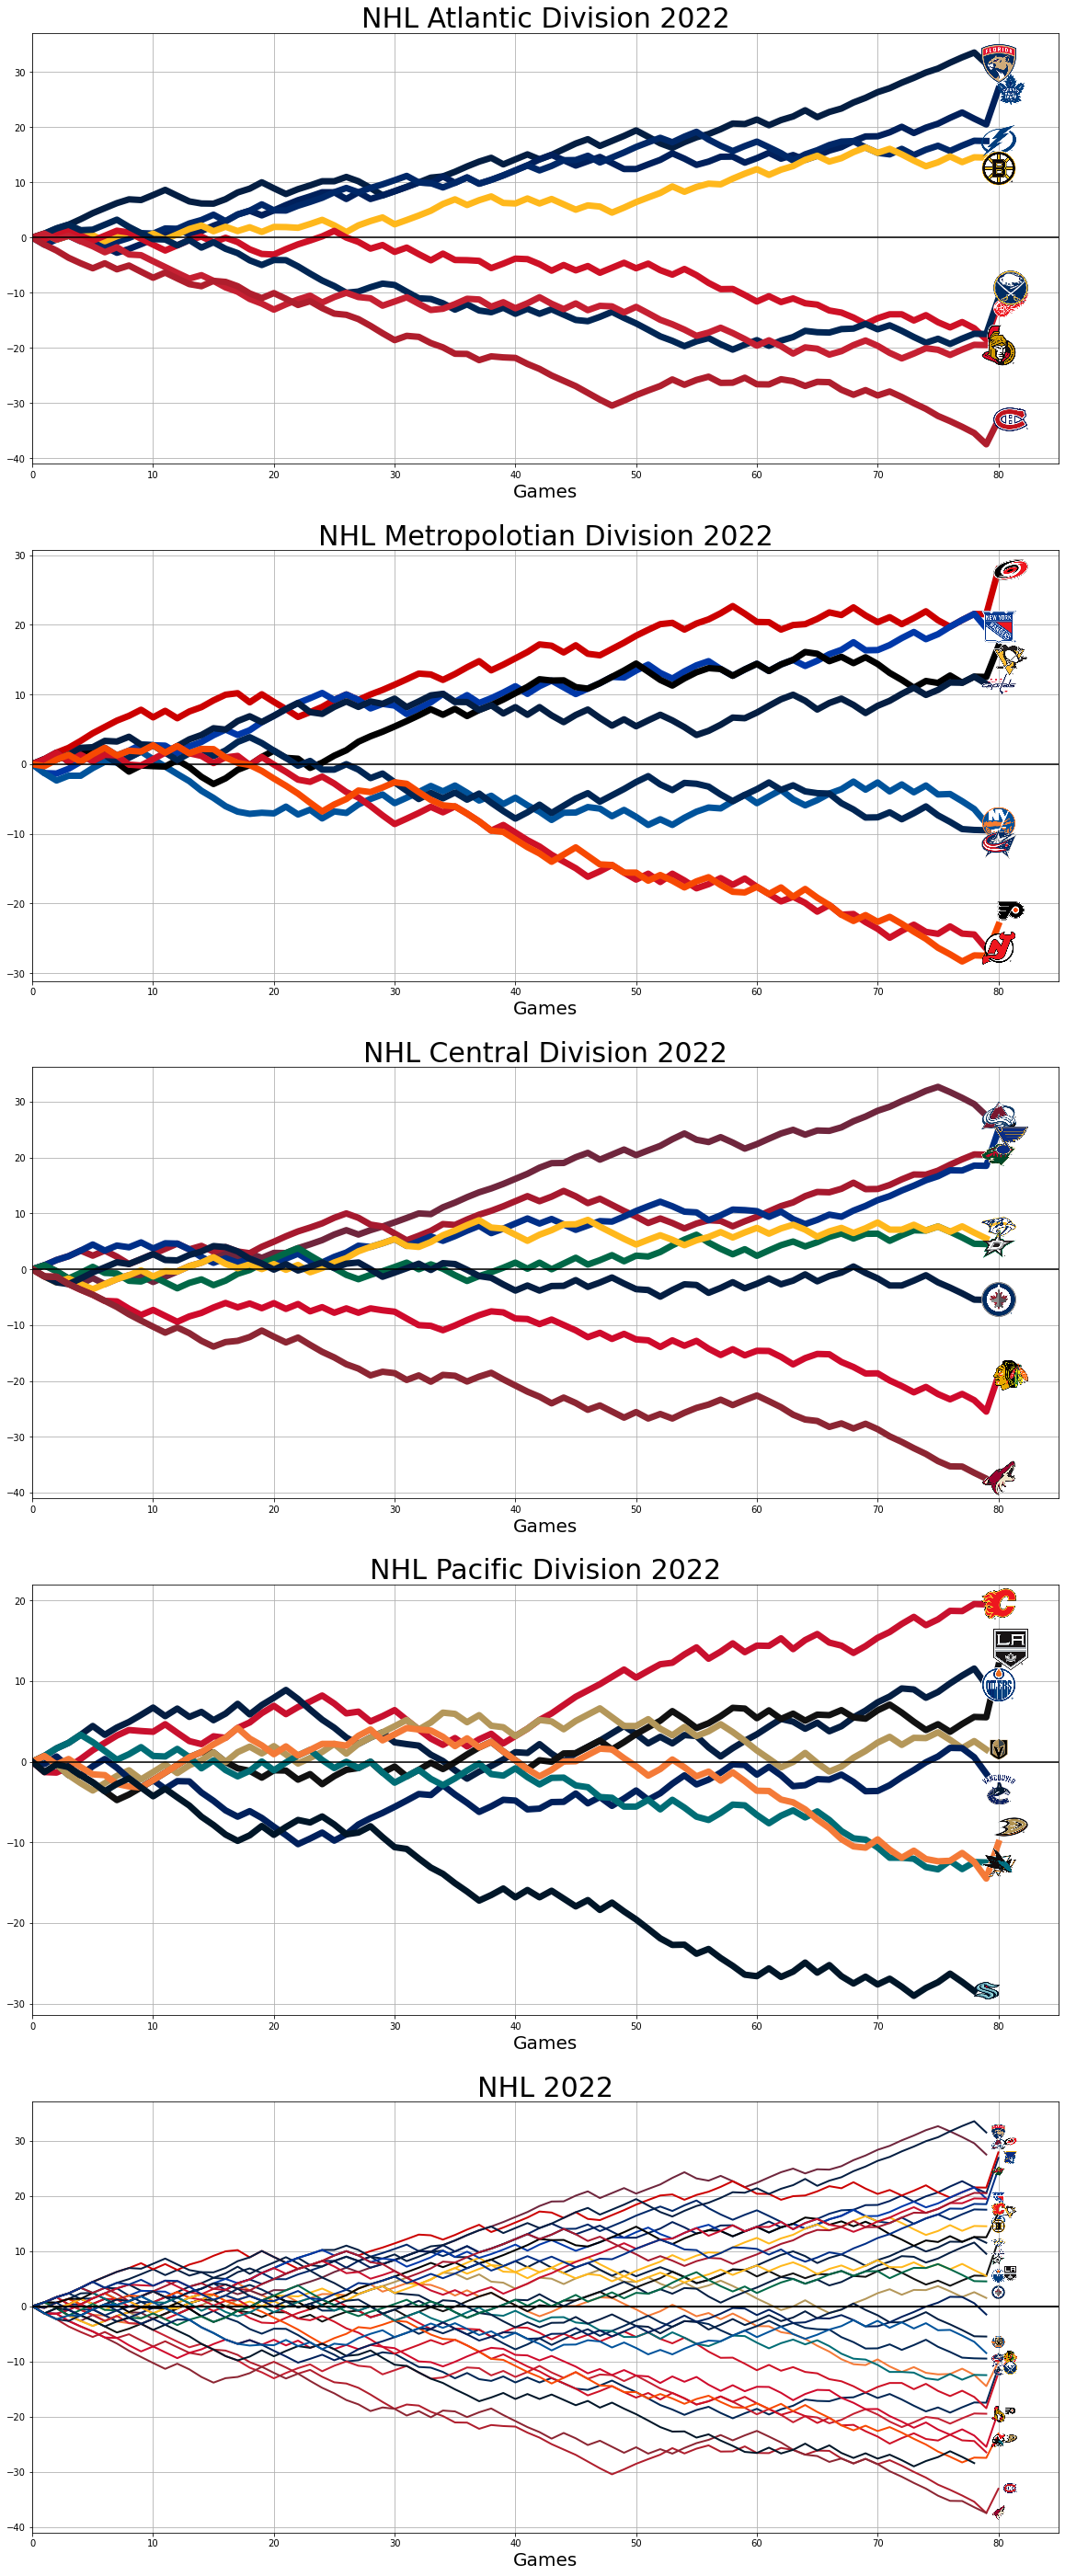

In [ ]:


fig, ax = plt.subplots(5)
fig.set_figheight(50)
fig.set_figwidth(20)

for i, div in enumerate(division):
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i],
                                                                                                                        grid = True)
  for line in ax[i].get_lines():
    line.set_linewidth(7)
  dontoverlay = []
  for team in div:
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
    testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
    for x in dontoverlay:
      testagainstploted.append(x-y)
    if min(np.abs(testagainstploted))<4:
      if min(np.abs(testagainstploted)) in testagainstploted:
        move = move - 2
      else:
        move = move + 2
    else:
      move = 0
    dontoverlay.append(y)
    arr = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr, zoom=0.25)
    ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
    ax[i].add_artist(ab)
  ax[i].set_title("NHL {} Division 2022".format(Divisions[i]), fontsize = 30)
  ax[i].set_xlabel('Games', fontsize = 20)
  ax[i].axhline(color = 'black')
### Adding all teams together
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,:].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[4],
                                                                                                                        grid = True)
for div in division:
  for team in div:
      y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
      testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
      for x in dontoverlay:
        testagainstploted.append(x-y)
      if min(np.abs(testagainstploted))<4:
        if min(np.abs(testagainstploted)) in testagainstploted:
          move = move - 2
        else:
          move = move + 2
      else:
        move = 0
      dontoverlay.append(y)
      arr = plt.imread(team + '.png') #needs to be team name +".png"
      imagebox = OffsetImage(arr, zoom=0.1)
      ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
      ax[4].add_artist(ab)
ax[4].set_title("NHL 2022", fontsize = 30)
ax[4].set_xlabel('Games', fontsize = 20)
ax[4].axhline(color = 'black')
for line in ax[4].get_lines():
  line.set_linewidth(2)
plt.show()

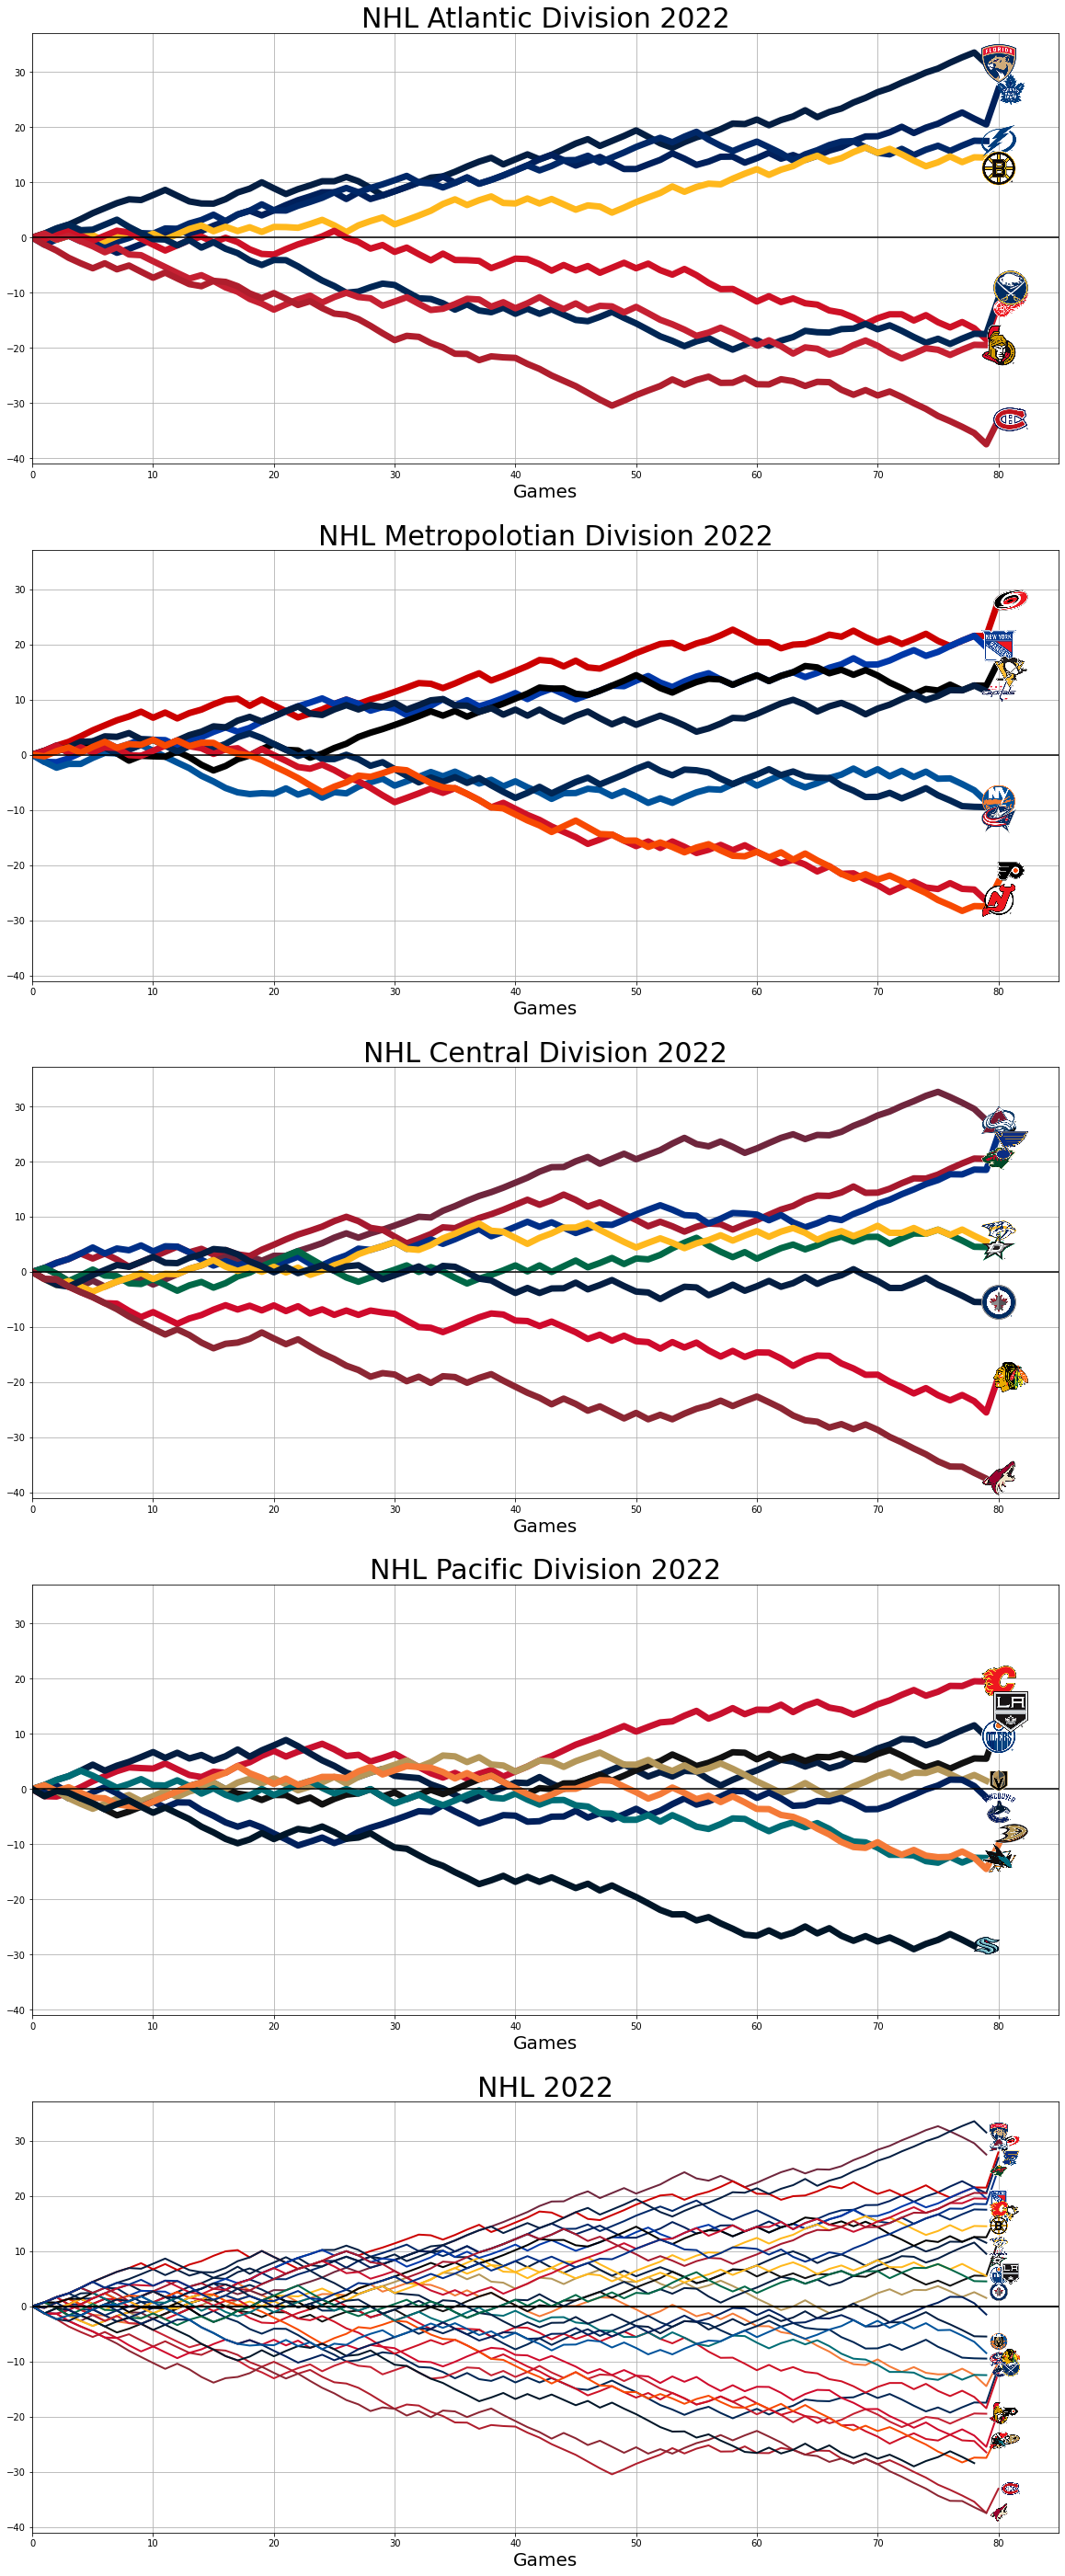

In [ ]:
fig, ax = plt.subplots(5, sharey = True)
fig.set_figheight(50)
fig.set_figwidth(20)


for i, div in enumerate(division):
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i],
                                                                                                                        grid = True)
  for line in ax[i].get_lines():
    line.set_linewidth(7)
  dontoverlay = []
  for team in div:
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
    testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
    for x in dontoverlay:
      testagainstploted.append(x-y)
    if min(np.abs(testagainstploted))<4:
      if min(np.abs(testagainstploted)) in testagainstploted:
        move = move - 2
      else:
        move = move + 2
    else:
      move = 0
    dontoverlay.append(y)
    arr = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr, zoom=0.25)
    ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
    ax[i].add_artist(ab)
  ax[i].set_title("NHL {} Division 2022".format(Divisions[i]), fontsize = 30)
  ax[i].set_xlabel('Games', fontsize = 20)
  ax[i].axhline(color = 'black')
### Adding all teams together
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,:].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[4],
                                                                                                                        grid = True)
for div in division:
  for team in div:
      y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
      testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
      for x in dontoverlay:
        testagainstploted.append(x-y)
      if min(np.abs(testagainstploted))<4:
        if min(np.abs(testagainstploted)) in testagainstploted:
          move = move - 2
        else:
          move = move + 2
      else:
        move = 0
      dontoverlay.append(y)
      arr = plt.imread(team + '.png') #needs to be team name +".png"
      imagebox = OffsetImage(arr, zoom=0.13)
      ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
      ax[4].add_artist(ab)
ax[4].set_title("NHL 2022", fontsize = 30)
ax[4].set_xlabel('Games', fontsize = 20)
ax[4].axhline(color = 'black')
for line in ax[4].get_lines():
  line.set_linewidth(2)
plt.show()

I still need to figure out the percentage of points that are expected.  Then I should be able to pass that as a percentage to a sub-title for each of my outputs.  Let's see what we can do.

In [ ]:
expected = [i for i in range(1,83)] #one point per game is the expected.
centralstand = []


actual = [totalpointsbygame.loc[78,team] for team in central]
expected = [78 for team in central]

(sum(actual) - sum(expected))/(78*4)

0.26282051282051283

What is clear to me is that I didn;t know what the P% was.  I think it is the point percentage or the percentage of games that a team gets points.  

In [ ]:
np.mean([i>0 for i in stlouisblues])


0.7317073170731707

In [ ]:
divavg = []
for team in central:
  divavg.append(np.mean([i>0 for i in globals()[team]]))

np.mean(divavg)

0.5975609756097561

There it is!  Let's add that back in!

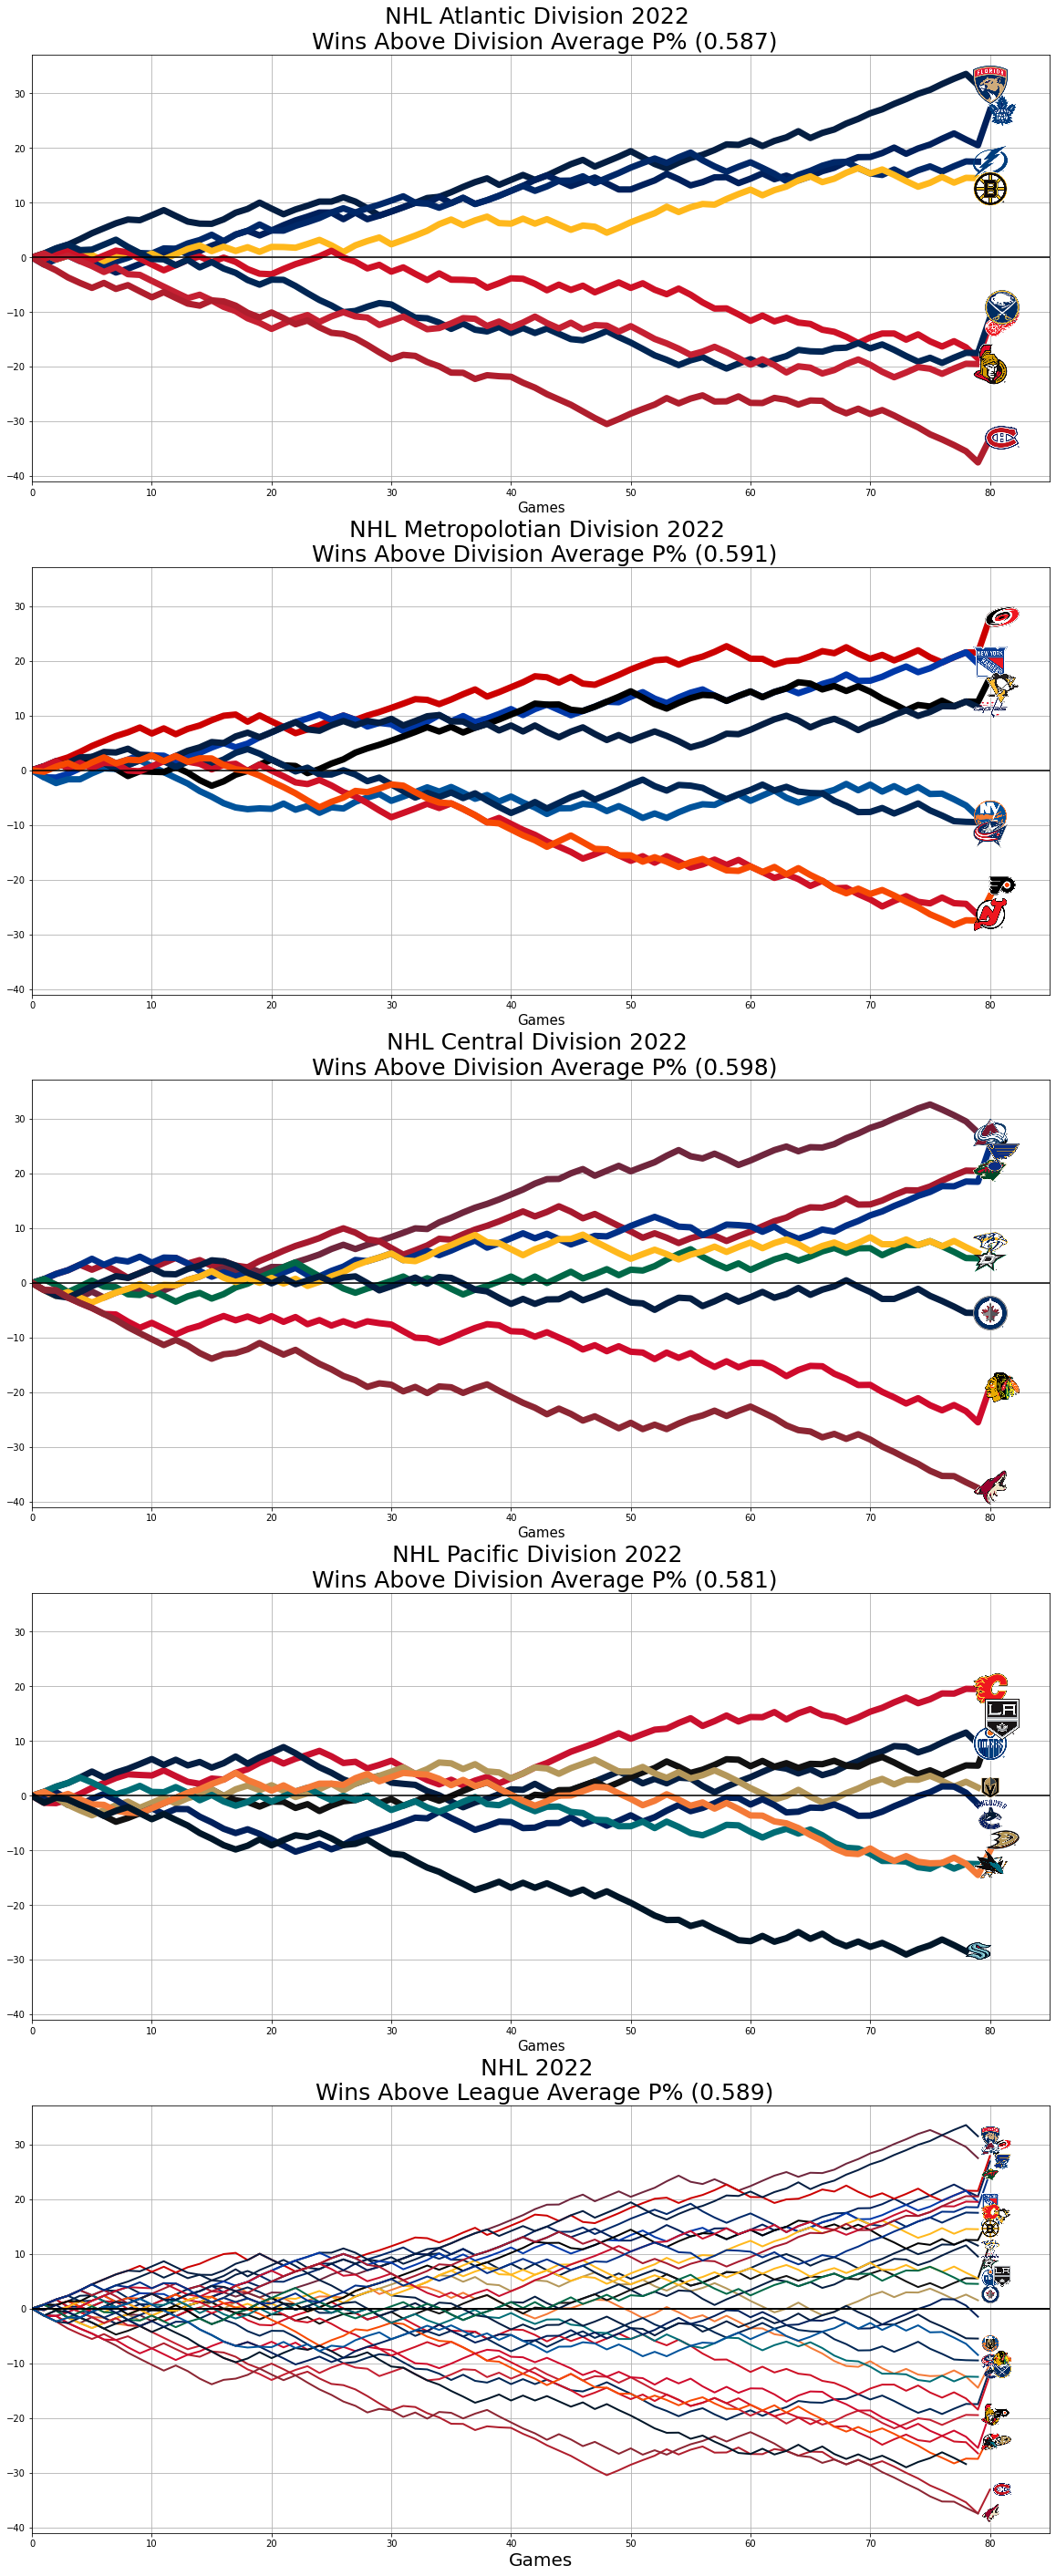

In [ ]:
fig, ax = plt.subplots(5, sharey = True)
fig.set_figheight(50)
fig.set_figwidth(20)
lgavg = []

for i, div in enumerate(division):
  divavg = []
  totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,div].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[i],
                                                                                                                        grid = True)
  for line in ax[i].get_lines():
    line.set_linewidth(7)
  dontoverlay = []
  for team in div:
    divavg.append(np.mean([i>0 for i in globals()[team]]))
    y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
    testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
    for x in dontoverlay:
      testagainstploted.append(x-y)
    if min(np.abs(testagainstploted))<4:
      if min(np.abs(testagainstploted)) in testagainstploted:
        move = move - 2
      else:
        move = move + 2
    else:
      move = 0
    dontoverlay.append(y)
    arr = plt.imread(team + '.png') #needs to be team name +".png"
    imagebox = OffsetImage(arr, zoom=0.25)
    ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
    ax[i].add_artist(ab)
  P = np.mean(divavg)
  lgavg.append(P)
  ax[i].set_title("NHL {} Division 2022 \n Wins Above Division Average P% ({})".format(Divisions[i],round(P,3)), fontsize = 25)
  ax[i].set_xlabel('Games', fontsize = 15)
  ax[i].axhline(color = 'black')


### Adding all teams together
totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[0:,:].plot(kind = 'line', 
                                                                                                                        legend = False, 
                                                                                                                        xlim = [0,85], 
                                                                                                                        #ylim = [-10,10], 
                                                                                                                        #yticks = range(-10,10,2), 
                                                                                                                        color = colors,
                                                                                                                        ax = ax[4],
                                                                                                                        grid = True)
for div in division:
  for team in div:
      y = totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]
      testagainstploted = [100]#needed this to be non-empty so put a huge value that will not be achieved by any team.
      for x in dontoverlay:
        testagainstploted.append(x-y)
      if min(np.abs(testagainstploted))<4:
        if min(np.abs(testagainstploted)) in testagainstploted:
          move = move - 2
        else:
          move = move + 2
      else:
        move = 0
      dontoverlay.append(y)
      arr = plt.imread(team + '.png') #needs to be team name +".png"
      imagebox = OffsetImage(arr, zoom=0.13)
      ab = AnnotationBbox(imagebox, (gamesplayed[team] + 1,totalpointsbygame.apply(lambda x: comparetoaverage(x,np.mean(totalpointsbygame, axis = 1))).loc[gamesplayed[team],team]+move ), frameon = False)
      ax[4].add_artist(ab)
ax[4].set_title("NHL 2022 \n Wins Above League Average P% ({})".format(round(np.mean(lgavg),3)), fontsize = 25)
ax[4].set_xlabel('Games', fontsize = 20)
ax[4].axhline(color = 'black')
for line in ax[4].get_lines():
  line.set_linewidth(2)
plt.show()